In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#create a set of random lat and long combinations
lats = np.random.uniform(low= -90.000, high= 90.000, size=1500)
lngs = np.random.uniform(low= -180.000, high= 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

26.946775053208498 -60.82814313562125
-4.485924736887256 -153.44597345745197
-24.83526193166719 -154.09805515185494
16.093226309589156 59.46438592506826
18.977697616465562 -97.66207351717671
-43.04618252449713 65.76940144621034
70.89476621465067 -65.27378668898963
-67.44367949744877 -7.738634122912913
55.756387412263734 119.69355234196439
42.17794253876721 -122.29592991848139
-80.95417599423806 76.05229425552847
-88.69468963326675 -98.81322271688151
20.25878431336325 -24.137299474000173
82.7665870771047 168.30027077339446
73.56427983943703 -40.43043150791175
-81.86233311398004 58.03591655523701
45.35443134892569 -52.90669692827316
-83.05758508305402 -67.60358834144739
-7.0625274481426885 -173.4743576565798
-77.05648479727094 17.529244760985137
-66.72824598536502 -143.448144714344
35.784993893234045 -34.58219044692811
-53.54158376427598 32.93785649372549
23.008615022421537 46.241438448260965
41.25944736542479 -45.26799462265933
-87.70717338248525 -116.28046500175085
-14.575932476536707 

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | avera
Processing Record 4 of Set 1 | salalah
Processing Record 5 of Set 1 | quecholac
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | tupik
Processing Record 10 of Set 1 | ashland
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | bay roberts
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | sataua
City not found. Skipping...
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | ribeira grande
Pr

Processing Record 36 of Set 4 | zhigansk
Processing Record 37 of Set 4 | kavieng
Processing Record 38 of Set 4 | almaznyy
Processing Record 39 of Set 4 | taldan
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | chapais
Processing Record 42 of Set 4 | naze
Processing Record 43 of Set 4 | la romana
Processing Record 44 of Set 4 | muscat
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | vung tau
Processing Record 47 of Set 4 | hueyapan
Processing Record 48 of Set 4 | coahuayana
Processing Record 49 of Set 4 | teya
Processing Record 50 of Set 4 | faya
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | kieta
Processing Record 3 of Set 5 | pamanukan
Processing Record 4 of Set 5 | surskoye
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | saskylakh
Processing Record 7 of Set 5 | santa luzia
Processing Record 8 of Set 5 | samusu
City not found. Skipping...
Processing Record 9 of Set 5 | pucallpa
Pro

Processing Record 28 of Set 8 | mikuni
Processing Record 29 of Set 8 | bonavista
Processing Record 30 of Set 8 | beringovskiy
Processing Record 31 of Set 8 | tsiroanomandidy
Processing Record 32 of Set 8 | concarneau
Processing Record 33 of Set 8 | bubaque
Processing Record 34 of Set 8 | marsh harbour
Processing Record 35 of Set 8 | chumikan
Processing Record 36 of Set 8 | alta floresta
Processing Record 37 of Set 8 | selkirk
Processing Record 38 of Set 8 | andenes
Processing Record 39 of Set 8 | black river
Processing Record 40 of Set 8 | lucapa
Processing Record 41 of Set 8 | noyabrsk
Processing Record 42 of Set 8 | belyy yar
Processing Record 43 of Set 8 | yirol
City not found. Skipping...
Processing Record 44 of Set 8 | almeirim
Processing Record 45 of Set 8 | cagliliog
Processing Record 46 of Set 8 | braslav
City not found. Skipping...
Processing Record 47 of Set 8 | verdun
Processing Record 48 of Set 8 | qostanay
Processing Record 49 of Set 8 | taitung
Processing Record 50 of Set

Processing Record 13 of Set 12 | samarai
Processing Record 14 of Set 12 | velluru
City not found. Skipping...
Processing Record 15 of Set 12 | vao
Processing Record 16 of Set 12 | santa isabel do rio negro
Processing Record 17 of Set 12 | araouane
Processing Record 18 of Set 12 | cordoba
Processing Record 19 of Set 12 | payyannur
Processing Record 20 of Set 12 | wanning
Processing Record 21 of Set 12 | ghanzi
Processing Record 22 of Set 12 | kralendijk
Processing Record 23 of Set 12 | zhuhai
Processing Record 24 of Set 12 | shenjiamen
Processing Record 25 of Set 12 | edson
Processing Record 26 of Set 12 | buala
Processing Record 27 of Set 12 | bougouni
Processing Record 28 of Set 12 | mundo nuevo
Processing Record 29 of Set 12 | san juan del cesar
Processing Record 30 of Set 12 | tsaghkadzor
Processing Record 31 of Set 12 | sistranda
Processing Record 32 of Set 12 | mwanza
Processing Record 33 of Set 12 | bellefontaine
Processing Record 34 of Set 12 | aktas
Processing Record 35 of Set 

In [16]:
len(city_data)

585

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hamilton,39.1834,-84.5333,73.60,33,0,4.61,US,2022-10-04 19:48:17
1,Faanui,-16.4833,-151.7500,77.81,77,23,22.32,PF,2022-10-04 19:48:34
2,Avera,33.1940,-82.5271,76.51,33,0,5.84,US,2022-10-04 19:48:35
3,Salalah,17.0151,54.0924,78.89,89,20,5.75,OM,2022-10-04 19:48:35
4,Quecholac,18.9500,-97.6667,73.31,31,96,7.14,MX,2022-10-04 19:48:36
5,Saint-Philippe,-21.3585,55.7679,69.39,81,39,11.10,RE,2022-10-04 19:48:37
6,Clyde River,70.4692,-68.5914,26.83,86,75,16.11,CA,2022-10-04 19:48:37
7,Cape Town,-33.9258,18.4232,58.12,59,0,5.75,ZA,2022-10-04 19:48:37
8,Tupik,54.4253,119.9327,23.22,62,90,3.11,RU,2022-10-04 19:48:38
9,Ashland,40.8167,-82.2665,66.16,50,70,11.34,US,2022-10-04 19:48:39


In [18]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hamilton,US,2022-10-04 19:48:17,39.1834,-84.5333,73.60,33,0,4.61
1,Faanui,PF,2022-10-04 19:48:34,-16.4833,-151.7500,77.81,77,23,22.32
2,Avera,US,2022-10-04 19:48:35,33.1940,-82.5271,76.51,33,0,5.84
3,Salalah,OM,2022-10-04 19:48:35,17.0151,54.0924,78.89,89,20,5.75
4,Quecholac,MX,2022-10-04 19:48:36,18.9500,-97.6667,73.31,31,96,7.14
5,Saint-Philippe,RE,2022-10-04 19:48:37,-21.3585,55.7679,69.39,81,39,11.10
6,Clyde River,CA,2022-10-04 19:48:37,70.4692,-68.5914,26.83,86,75,16.11
7,Cape Town,ZA,2022-10-04 19:48:37,-33.9258,18.4232,58.12,59,0,5.75
8,Tupik,RU,2022-10-04 19:48:38,54.4253,119.9327,23.22,62,90,3.11
9,Ashland,US,2022-10-04 19:48:39,40.8167,-82.2665,66.16,50,70,11.34


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

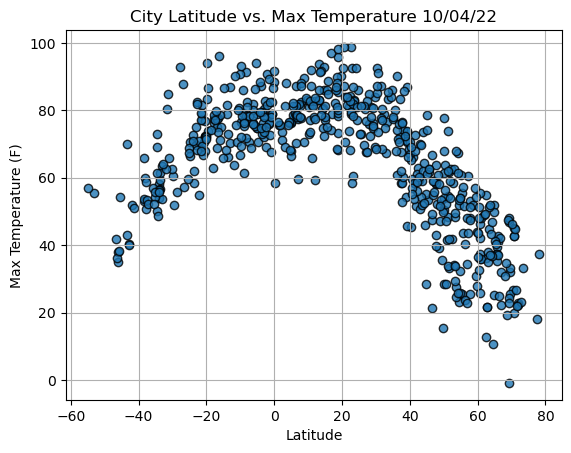

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

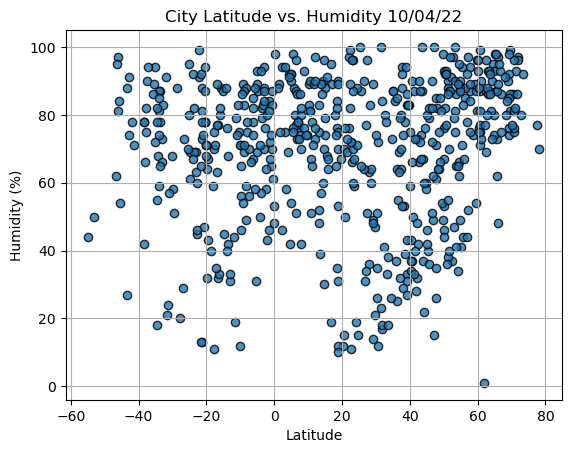

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

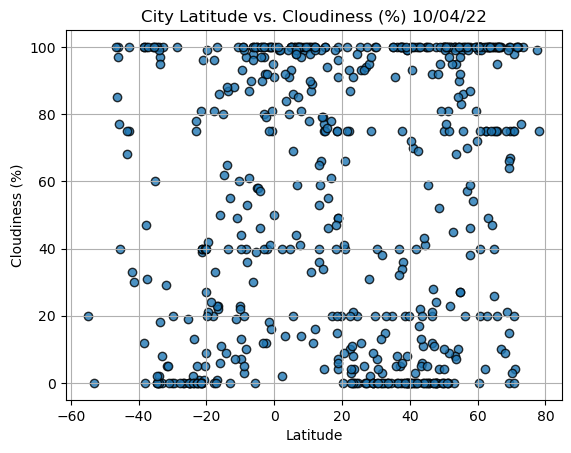

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

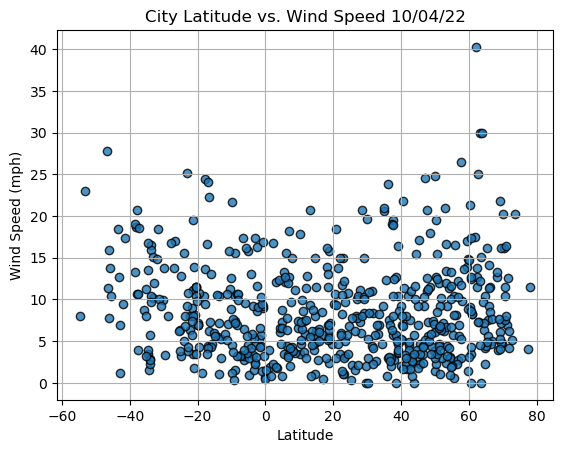

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

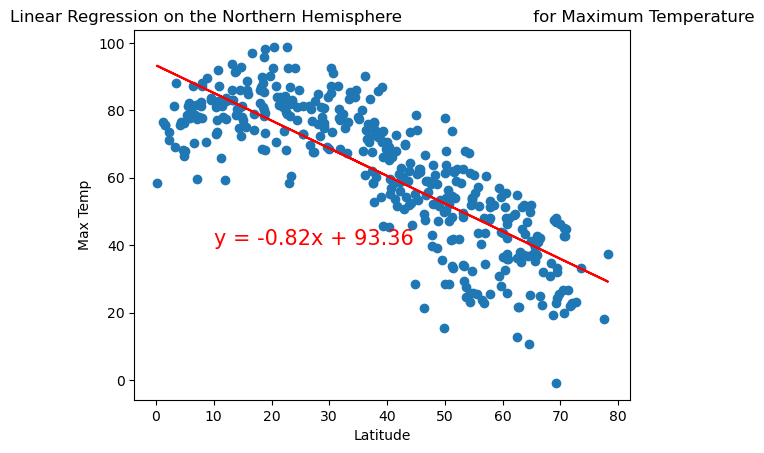

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

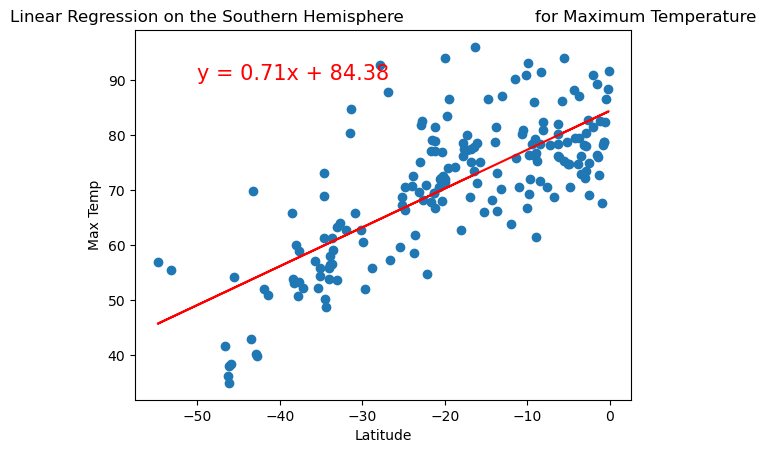

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


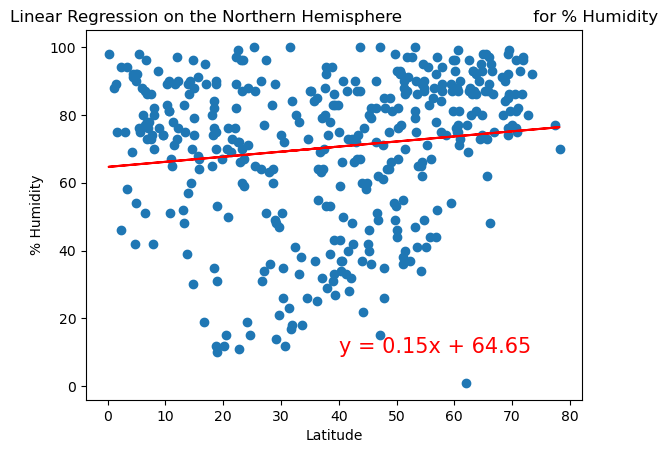

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

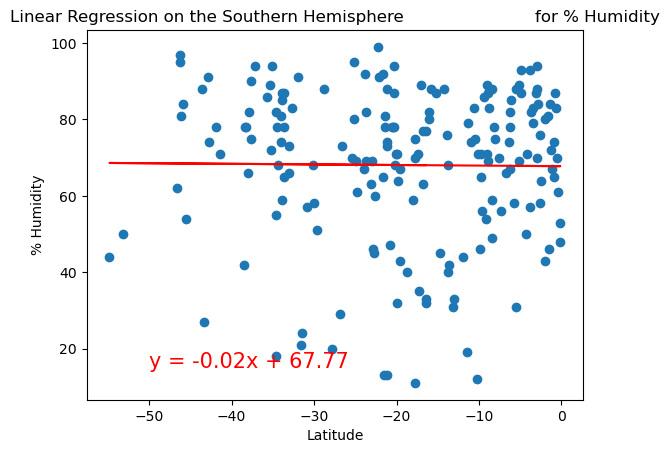

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

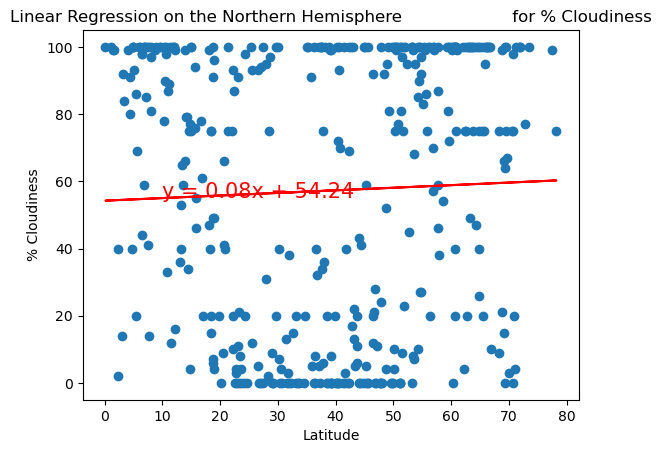

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

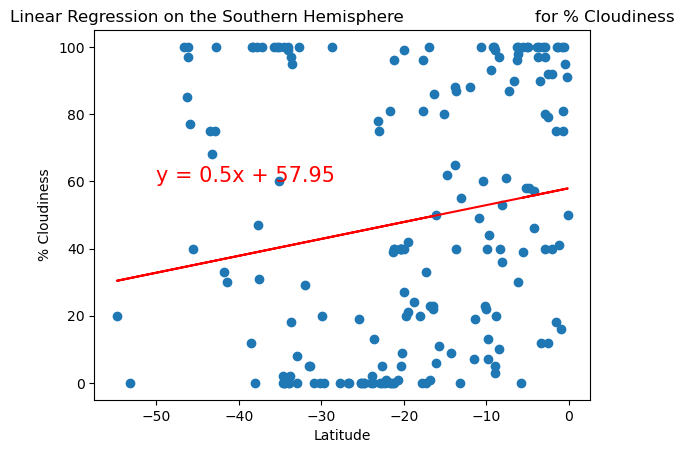

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

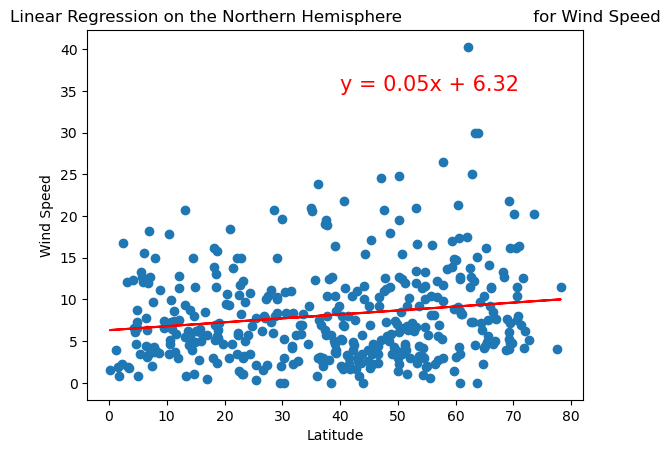

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

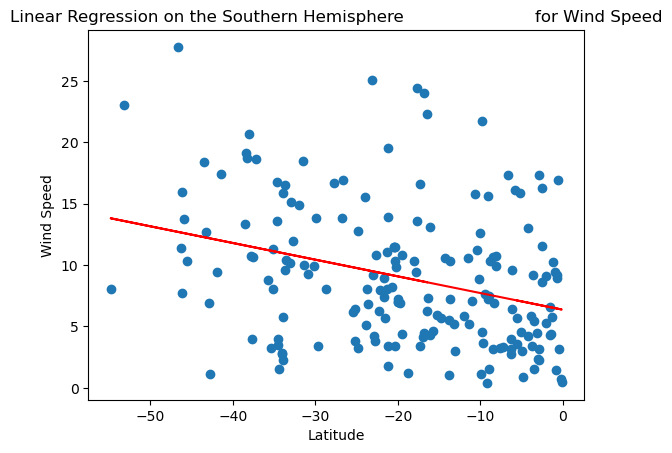

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))